# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

The table below shows historical exchange rates between the Indonesian Rupiah (IDR) and the US Dollar (USD) between 7/12/2021 and 1/7/2022

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

C:\Users\Gerry Alfonsus\anaconda3_86\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
soup

<!DOCTYPE html>

<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang="en"><!--<![endif]-->
<head>
<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
<meta charset="utf-8"><meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<base href="https://www.exchange-rates.org/"/>
<meta content="View a table of historical Indonesian Rupiah exchange rates against the US Dollar.  You may also export this information to Excel or another spreadsheet program." name="description"/>
<meta content="Indonesian Rupiah, historical exchange rates, US Dollar" name="keywords"/>
<meta content="Affinity" name="mapping"/>
<link href="https://www.exchange-rates.org/history/IDR/USD/T" rel="canonical"/>
<link href="https://d1drv07xrq

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. 
We can see from inspecting the web that the key refer to : `<div class="table-responsive">`

In [4]:
table = soup.find('div',attrs={'class':'table-responsive'})
print(table.prettify()[1:500])

div class="table-responsive">
 <table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
  <tbody>
   <tr>
    <td>
     1/7/2022
    </td>
    <td>
     Friday
    </td>
    <td>
     <a href="/Rate/USD/IDR/1-7-2022">
      14,303.69386
     </a>
     IDR
    </td>
    <td class="text-narrow-screen-hidden">
     <a href="/Rate/USD/IDR/1-7-2022">
      USD IDR rate for 1/7/2022
     </a>
    </td>
   </tr>
   <tr>
    <td>
     1/6/2022
    </td>
    <td>
 


Finding row length.

In [5]:
row = table.find_all('tr')
row_length = len(row)
row_length

130

Do the scrapping process here:
1. Period: Scrapping the **period** column was kind of tricky, since almost all columns refer only to one key `<td>`, so we need to find the pattern that could scrap only for **period** column. Here, I get the pattern that every 4 times in a row, it appears **period** 
2. Rate: Same as **period**, scrapping the **rate** column was kind of tricky too. There are 2 field that refer to key `<a>` to detect **rate**, so we also need to find the pattern that could scrap only for **rate** column. Here, I get the pattern that every 2 times in a row, it appears **rate** 
    

In [6]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process    
    #get period 
    period = table.find_all('td')[i*4].text

    #get period 
    rate = table.find_all('a')[i*2].text

    temp.append((period,rate)) 
temp 

[('1/7/2022', '14,303.69386'),
 ('1/6/2022', '14,387.13904'),
 ('1/5/2022', '14,376.59427'),
 ('1/4/2022', '14,306.22137'),
 ('1/3/2022', '14,271.10676'),
 ('12/31/2021', '14,184.77099'),
 ('12/30/2021', '14,249.76380'),
 ('12/29/2021', '14,198.28676'),
 ('12/28/2021', '14,221.34174'),
 ('12/27/2021', '14,227.31928'),
 ('12/24/2021', '14,264.51755'),
 ('12/23/2021', '14,256.89960'),
 ('12/22/2021', '14,298.20378'),
 ('12/21/2021', '14,304.01234'),
 ('12/20/2021', '14,382.49273'),
 ('12/17/2021', '14,389.66562'),
 ('12/16/2021', '14,330.91366'),
 ('12/15/2021', '14,251.62584'),
 ('12/14/2021', '14,341.93227'),
 ('12/13/2021', '14,357.75629'),
 ('12/10/2021', '14,370.27875'),
 ('12/9/2021', '14,344.97904'),
 ('12/8/2021', '14,370.91961'),
 ('12/7/2021', '14,347.32452'),
 ('12/6/2021', '14,432.56943'),
 ('12/3/2021', '14,389.50020'),
 ('12/2/2021', '14,392.39767'),
 ('12/1/2021', '14,347.93748'),
 ('11/30/2021', '14,353.30743'),
 ('11/29/2021', '14,295.39385'),
 ('11/26/2021', '14,300.353

We can see the data was reversed, so we can sort it using this code:

In [7]:
temp = temp[::-1]
temp

[('7/12/2021', '14,491.59294'),
 ('7/13/2021', '14,476.52203'),
 ('7/14/2021', '14,404.17703'),
 ('7/15/2021', '14,469.95831'),
 ('7/16/2021', '14,495.41215'),
 ('7/19/2021', '14,490.12260'),
 ('7/20/2021', '14,514.10964'),
 ('7/21/2021', '14,495.34596'),
 ('7/22/2021', '14,508.09177'),
 ('7/23/2021', '14,492.63051'),
 ('7/26/2021', '14,487.54718'),
 ('7/27/2021', '14,468.66842'),
 ('7/28/2021', '14,414.21667'),
 ('7/29/2021', '14,467.14994'),
 ('7/30/2021', '14,501.55250'),
 ('8/2/2021', '14,445.82502'),
 ('8/3/2021', '14,391.49693'),
 ('8/4/2021', '14,313.11092'),
 ('8/5/2021', '14,315.95314'),
 ('8/6/2021', '14,403.07373'),
 ('8/9/2021', '14,363.60538'),
 ('8/10/2021', '14,379.25224'),
 ('8/11/2021', '14,385.48676'),
 ('8/12/2021', '14,387.28127'),
 ('8/13/2021', '14,327.19776'),
 ('8/16/2021', '14,376.39296'),
 ('8/17/2021', '14,439.92418'),
 ('8/18/2021', '14,372.20861'),
 ('8/19/2021', '14,411.77604'),
 ('8/20/2021', '14,460.04574'),
 ('8/23/2021', '14,400.21794'),
 ('8/24/2021',

## Creating data frame & Data wrangling

Put the array into dataframe

In [59]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('period','rate'))
df.head()

,period,rate
0,7/12/2021,"14,491.59294"
1,7/13/2021,"14,476.52203"
2,7/14/2021,"14,404.17703"
3,7/15/2021,"14,469.95831"
4,7/16/2021,"14,495.41215"


## Data Cleaning
First, we want to see if the data has missing values using this code:

In [60]:
df.isna().sum()

period    0
rate      0
dtype: int64

As we can see, the data has no missing values, so we don't need the imputation process

Next, we will check the types of data, and assign them to the right types

In [61]:
df.dtypes

period    object
rate      object
dtype: object

In [62]:
df['rate'] = df['rate'].str.replace(",","")
df['rate'] = df['rate'].astype('float64')

df['period'] = df['period'].astype('datetime64')

df.dtypes

period    datetime64[ns]
rate             float64
dtype: object

### Data visualisation 
#### 1. Day to Day Historical Data, using line plot since it was a time series data 

In [63]:
df = df.set_index('period')

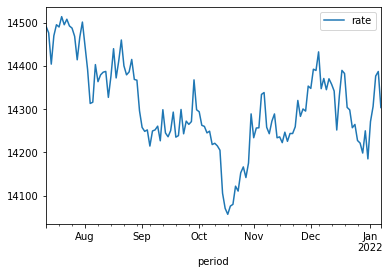

In [64]:
df.plot()

#### 2. Average per Month of Exchange Rate

In [89]:
df2 = df.copy()
df2 = df2.reset_index()
df2['month'] = df2['period'].dt.to_period('M')
df2

,index,period,rate,month
0,0,2021-07-12,14491.59294,2021-07
1,1,2021-07-13,14476.52203,2021-07
2,2,2021-07-14,14404.17703,2021-07
3,3,2021-07-15,14469.95831,2021-07
4,4,2021-07-16,14495.41215,2021-07
...,...,...,...,...
125,125,2022-01-03,14271.10676,2022-01
126,126,2022-01-04,14306.22137,2022-01
127,127,2022-01-05,14376.59427,2022-01
128,128,2022-01-06,14387.13904,2022-01


(13500.0, 14600.0)

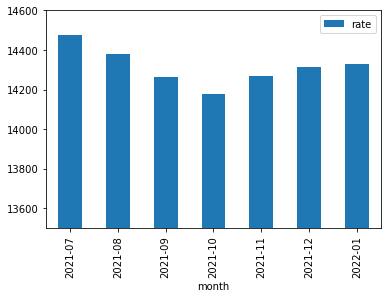

In [90]:
import matplotlib.pyplot as plt
ax2 = df[['month','rate']].groupby(by = 'month').mean().plot(kind="bar")
plt.ylim((13500,14600))

>Insights:
1. The trend of Exchange Rate month by month were decreasing, until the lowest Exchange Rate of IDR to USD happened in October
2. Start from November, the exchange rate was started to increase again, even that the rate was still very unstable. 

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`